# Logistic Regression

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

print("Libraries imported")

Libraries imported


## Model Architecture

In [2]:
import numpy as np

class LogisticRegression:
    """
    Logistic Regression Classifier

    Parameters:
    - lr (float): Learning rate for gradient descent optimization.
    - num_iter (int): Number of iterations for gradient descent.

    Methods:
    - fit(X, y): Fit the logistic regression model to the training data.
    - predict(X): Predict the binary class labels for new data.
    - _sigmoid(z): Apply the sigmoid function to a value or array.

    Attributes:
    - weights (array): Learned weights for the features.
    - bias (float): Learned bias term.
    """

    def __init__(self, lr=0.01, num_iter=1000):
        """
        Initialize the LogisticRegression model.

        Parameters:
        - lr (float): Learning rate for gradient descent optimization.
        - num_iter (int): Number of iterations for gradient descent.
        """
        self.lr = lr
        self.num_iter = num_iter
        self.weights = None
        self.bias = None
        
    def fit(self, X, y):
        """
        Fit the logistic regression model to the training data.

        Parameters:
        - X (array-like): Training feature matrix.
        - y (array-like): Target binary class labels.
        """
        if len(X.shape) == 1:
            n_samples = 1
            n_features = 1
            self.weights = 0
        else:
            n_samples, n_features = X.shape
            self.weights = np.zeros(n_features)

        self.bias = 0

        for i in range(self.num_iter):
            z = np.dot(X, self.weights) + self.bias
            y_pred = self._sigmoid(z)
            cost = (-1 / n_samples) * np.sum(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))
            
            dw = (1 / n_samples) * np.dot(X.T, (y_pred - y))
            db = (1 / n_samples) * np.sum(y_pred - y)
            
            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    def predict(self, X):
        """
        Predict the binary class labels for new data.

        Parameters:
        - X (array-like): New data feature matrix.

        Returns:
        - y_predicted_cls (array): Predicted binary class labels.
        """
        z = np.dot(X, self.weights) + self.bias
        y_hat = self._sigmoid(z)
        y_predicted_cls = np.round(y_hat).astype(int)
        return np.array(y_predicted_cls)
    
    def _sigmoid(self, z):
        """
        Apply the sigmoid function to a value or array.

        Parameters:
        - z (float or array): Input value or array.

        Returns:
        - sigmoid_result (float or array): Result after applying the sigmoid function.
        """
        return 1 / (1 + np.exp(-z))


## Dataset

In [3]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

X, y = make_classification(n_samples=1000, n_features=2, n_classes=2, n_clusters_per_class=1, n_redundant=0, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
log_reg = LogisticRegression(lr=0.1, num_iter=10)
log_reg.fit(X_train, y_train)

In [5]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred = log_reg.predict(X_test)

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average='weighted')
rec = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Accuracy:", acc)
print("Precision:", prec)
print("Recall:", rec)
print("F1 Score:", f1)

Accuracy: 0.895
Precision: 0.8966616054256504
Recall: 0.895
F1 Score: 0.8947228158390951


## Visualization

Text(0.5, 1.0, 'Logistic Regression')

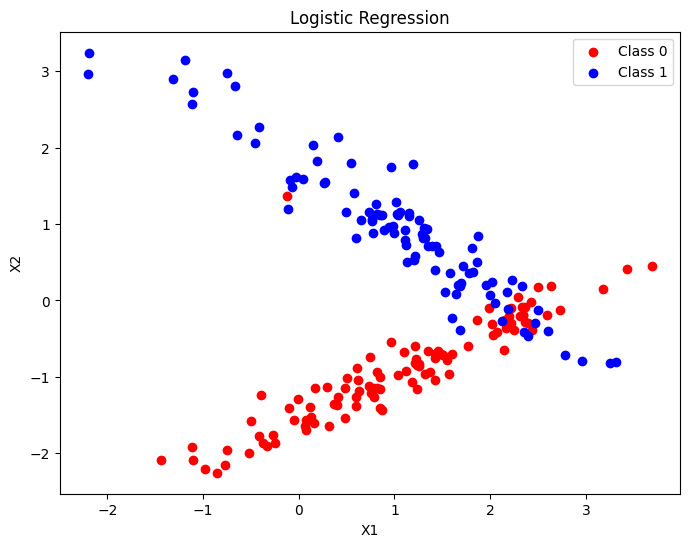

In [6]:
fig, ax = plt.subplots(figsize=(8,6))

ax.scatter(X_test[y_test == 0, 0], X_test[y_test == 0, 1], c='r', label='Class 0')
ax.scatter(X_test[y_test == 1, 0], X_test[y_test == 1, 1], c='b', label='Class 1')
ax.legend()
ax.set_xlabel("X1")
ax.set_ylabel("X2")
ax.set_title("Logistic Regression")